## **PRACTICA 1**: *CLASIFICACION - homeLoanAproval*
#### **AUTOR**: *Adrian Grassin Luis*

Empezaremos por cargar las librerias necesarias para el desarrollo de la practica, asi como los datos que se utilizaran para el desarrollo de la misma.
Entre las librerias a utilizar se encuentran:
- pandas
- numpy
- matplotlib
- sklearn


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Carga de datos
data = pd.read_csv('data.csv')

# Visualización inicial de los datos para verificar que se cargaron correctamente
print(data.head())

# Tipos de datos
print("\nTipos de datos:")
print(data.dtypes)

# Generacion de valores descriptivos, media, mediana, desviación estandar, cuartiles, entre otros.
print("\nEstadísticas descriptivas:")
print(data.describe())

# Verificación de valores faltantes por columna
print("\nValores faltantes por columna:")
print(data.isnull().sum())

    Loan_ID Gender Married Dependents     Education SelfEmployed  \
0  LP001002   Male      No          0      Graduate           No   
1  LP001003   Male     Yes          1      Graduate           No   
2  LP001005   Male     Yes          0      Graduate          Yes   
3  LP001006   Male     Yes          0  Not Graduate           No   
4  LP001008   Male      No          0      Graduate           No   

   ApplicantIncome CoapplicantIncome  LoanAmount  LoanAmountTerm PropertyArea  \
0             5849                 0         NaN           360.0        Urban   
1             4583              1508       128.0           360.0        Rural   
2             3000                 0        66.0           360.0        Urban   
3             2583              2358       120.0           360.0        Urban   
4             6000                 0       141.0           360.0        Urban   

  LoanStatus  
0          Y  
1          N  
2          Y  
3          Y  
4          Y  

Tipos de dato

Lo visto anteriormente, nos permite una mejor comprension de los datos con los que se trabajara, asi como la forma en que se deben de tratar los mismos para obtener un mejor rendimiento en los modelos de clasificacion que se desarrollaran. Primero, trataremos de hacer el analisis sin preprocesamiento de datos mediante un arbol de clasificacion.


Exactitud: 0.5909090909090909


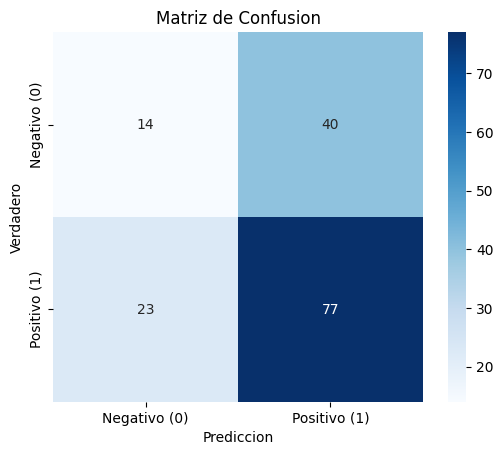

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('data.csv')

# Eliminación de la columna Loan_ID, no aporta información relevante
data = data.drop(columns='Loan_ID')

data = pd.get_dummies(data, drop_first=True)

# Utilización de OneHotEncoder para las columnas PropertyArea y Dependents

# Emplearemos un arbol de clasificacion como modelo 
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

# Creación del modelo
modeloTree = DecisionTreeClassifier()
modeloTree.fit(X_train, y_train)

# Predicción
predicciones = modeloTree.predict(X_test)
exactitud = accuracy_score(y_test, predicciones)

print("Exactitud:", exactitud)

matriz_confusion = confusion_matrix(y_test, predicciones)

sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap="Blues", square=True,
            xticklabels=["Negativo (0)", "Positivo (1)"],
            yticklabels=["Negativo (0)", "Positivo (1)"])
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusion')

plt.show()

Nos encontraremos que la precision del modelo de los datos sin procesar es de alrededor del 60%


A continuacion preprocesaremos y normalizaremos los datos


Tipos de datos:
Gender                object
Married               object
Dependents            object
Education             object
SelfEmployed          object
ApplicantIncome        int64
CoapplicantIncome     object
LoanAmount           float64
LoanAmountTerm       float64
PropertyArea          object
LoanStatus            object
dtype: object

Tipos de datos corregidos:
Gender                       bool
Married                      bool
Education                    bool
SelfEmployed                 bool
ApplicantIncome           float64
CoapplicantIncome         float64
LoanAmount                float64
LoanAmountTerm            float64
LoanStatus                   bool
Dependents_0.0               bool
Dependents_1.0               bool
Dependents_2.0               bool
Dependents_3.0               bool
PropertyArea_Rural           bool
PropertyArea_Semiurban       bool
PropertyArea_Urban           bool
dtype: object

Valores faltantes por columna:
Gender                    0
Marr

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'LoanAmountTerm'}>]], dtype=object)

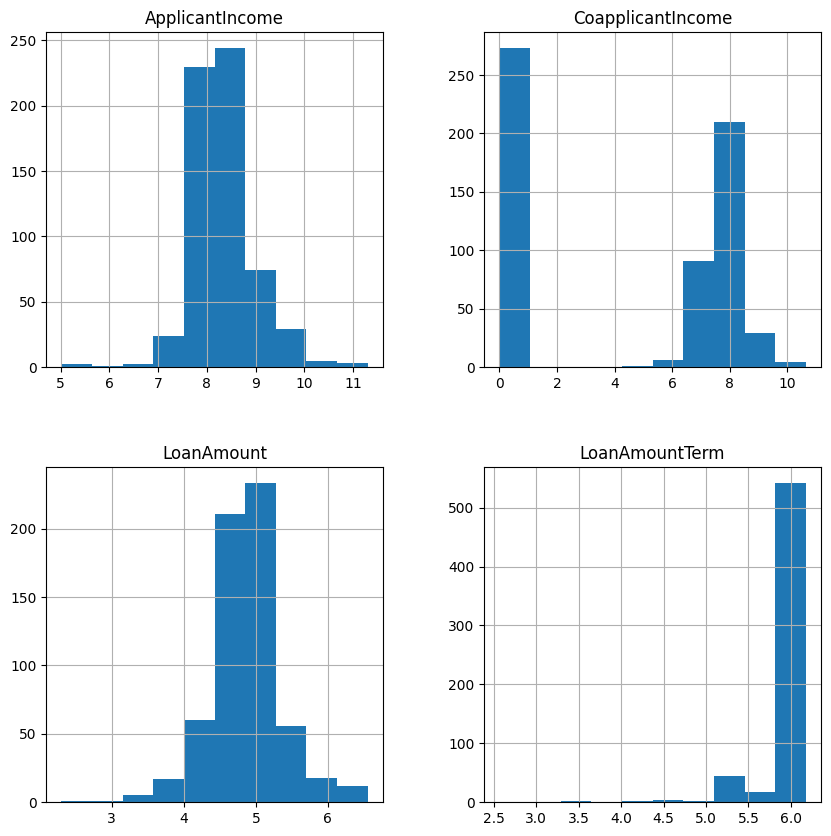

In [85]:
data = pd.read_csv('data.csv')

data = data.drop(columns='Loan_ID')
# Comprobacion de los tipos de datos
print("\nTipos de datos:")
print(data.dtypes)

# Imputación de valores faltantes para variables categóricas y numéricas
categorical_cols = ['Gender', 'Married', 'SelfEmployed']
for col in categorical_cols:
    mode_value = data[col].mode()[0]  # Obtener el valor de la moda para la columna actual
    data[col] = data[col].fillna(mode_value) 

# Corrección de los tipos de datos para las columnas que deberían ser numéricas
data['CoapplicantIncome'] = pd.to_numeric(data['CoapplicantIncome'], errors='coerce')

# Dependendents tiene valores '3+' que se deben reemplazar por 3
data['Dependents'] = pd.to_numeric(data['Dependents'], errors='coerce')

# Corrección de los tipos de datos que deberían ser booleanos [Gender, Married, Education, SelfEmployed, LoanStatus]
data['Gender'] = data['Gender'].apply(lambda x: True if x == 'Male' else False)
data['Married'] = data['Married'].astype(bool)
data['Education'] = data['Education'].apply(lambda x: True if x == 'Graduate' else False)
data['SelfEmployed'] = data['SelfEmployed'].astype(bool)
data['LoanStatus'] = data['LoanStatus'].apply(lambda x: True if x == 'Y' else False)

### Resumen de los datos booleanos
### Gender: Male (1) | Female (0)
### Married: Yes (1) | No (0)
### Education: Graduate (1) | Not Graduate (0)
### SelfEmployed: Yes (1) | No (0)
### LoanStatus: Y (1) | N (0)

# Imputación de valores faltantes para variables numéricas
data['Dependents'] = data['Dependents'].fillna(3)
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['LoanAmountTerm'] = data['LoanAmountTerm'].fillna(data['LoanAmountTerm'].median())
data['CoapplicantIncome'] = data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].median())

# Normalización de las variables numéricas
data['ApplicantIncome'] = np.log1p(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])
data['LoanAmount'] = np.log1p(data['LoanAmount'])
data['LoanAmountTerm'] = np.log1p(data['LoanAmountTerm'])
data = pd.get_dummies(data, columns=['Dependents', 'PropertyArea'])


# Verificación de los tipos de datos corregidos
print("\nTipos de datos corregidos:")
print(data.dtypes)

# Verificación de valores faltantes por columna
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Graficación de la distribución de las variables numéricas con espacio suficiente para visualizar
data.hist(figsize=(10,10))



Como podemos comprobar, los datos ya se encuentran limpios y listos para ser empleados en los modelos de clasificacion, por lo que procederemos a la creacion de los mismos.

#### **MODELOS DE CLASIFICACION**

**KNN**

0.9354838709677419


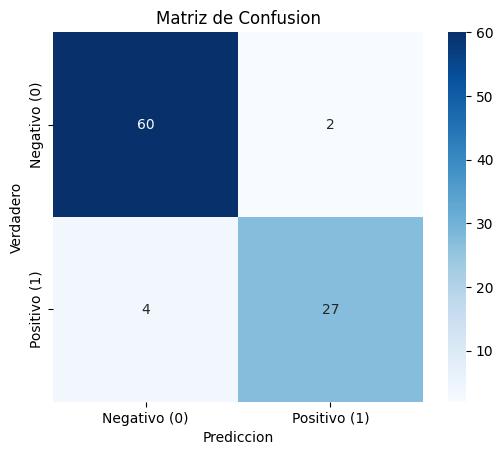

In [86]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo
knn = KNeighborsClassifier(n_neighbors=3)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=None)

# Entrenamos el modelo
knn.fit(X_train, y_train)

# Realizamos predicciones
predicciones = knn.predict(X_test)

# Evaluamos el modelo
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicciones))

matriz_confusion = confusion_matrix(y_test, predicciones)

sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap="Blues", square=True,
            xticklabels=["Negativo (0)", "Positivo (1)"],
            yticklabels=["Negativo (0)", "Positivo (1)"])
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusion')

plt.show()

Despues del preprocesamiento de datos, podemos ver una mejora bastante significativa en el desempeño del modelo, alcanzando un porcentaje de aciertos superior al 90% en la mayoria de casos.

**ARBOL DE CLASIFICACION**

Exactitud: 1.0


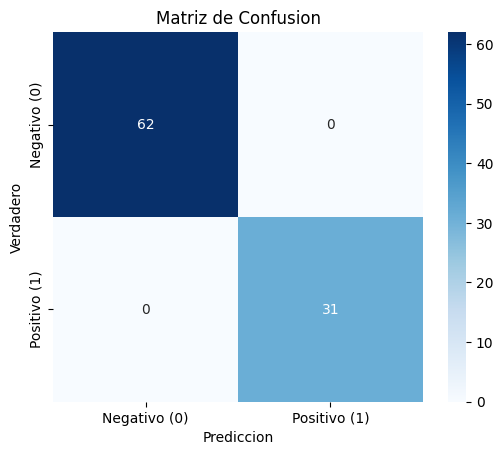

In [87]:
# Creación del modelo
modeloTree = DecisionTreeClassifier()
modeloTree.fit(X_train, y_train)

# Predicción
predicciones = modeloTree.predict(X_test)
exactitud = accuracy_score(y_test, predicciones)

print("Exactitud:", exactitud)

matriz_confusion = confusion_matrix(y_test, predicciones)

sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap="Blues", square=True,
            xticklabels=["Negativo (0)", "Positivo (1)"],
            yticklabels=["Negativo (0)", "Positivo (1)"])
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusion')

plt.show()

**CLASIFICADOR NAIVE BAYES**

Exactitud: 1.0


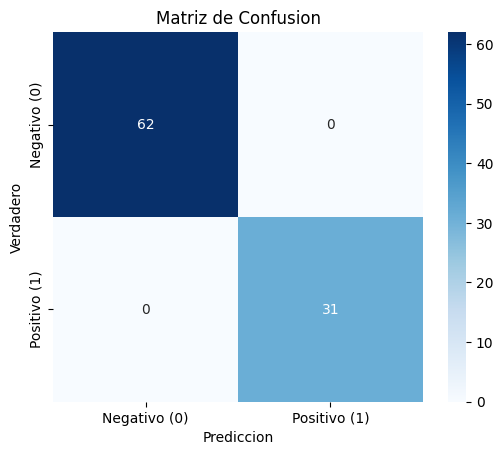

In [88]:
from sklearn.naive_bayes import GaussianNB

modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)

predicciones_nb = modelo_nb.predict(X_test)
exactitud_nb = accuracy_score(y_test, predicciones_nb)

print("Exactitud:", exactitud)

matriz_confusion = confusion_matrix(y_test, predicciones_nb)

sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap="Blues", square=True,
            xticklabels=["Negativo (0)", "Positivo (1)"],
            yticklabels=["Negativo (0)", "Positivo (1)"])
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusion')

plt.show()